In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import plotly.express as px
import plotly.graph_objs as go

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.power import FTestPower


In [4]:
df=pd.read_csv("/kaggle/input/pesteda/Pest_data_EDA.csv")
df.head(3)

,Crop,Pest_Name,Temperature_Range_Min,Temperature_Range_Max,Humidity_Range_Min,Humidity_Range_Max,Rainfall,Sunlight_Exposure,Life_Stage,Stage_Duration_Min,Stage_Duration_Max,Seasonal_Appearance,Feeding_Target,Feeding_Duration,Damage_Patterns,Control_Susceptibility,Crop_Susceptibility_Stage,Crop_Preventive_Measures,Non-pesticidal_control_measures,Chemical_control_measures
0,Apple,Apple Codling Moth,15.0,25.0,60,80,2500,Full sun,Larva,14.0,21,Spring\nSummer,Fruits,21,Tunneling,Susceptible to insecticides,Fruiting,Hand-picking larvae; Pruning,Pheromone traps;,Insecticide spray
1,Apple,Apple Maggot Fly,20.0,30.0,60,80,2500,Partial Shade,Egg,3.0,10,Summer,Fruits,10,Maggot-infested fruit,Susceptible to insecticides,Fruiting,Sanitation; Trapping; Insecticides,"farmers may destroy infested apples, hawthorn,...","Sprays for control of the codling moth, Cydia ..."
2,Apple,Apple Maggot Fly,20.0,30.0,60,80,2500,Partial Shade,Larva,20.0,30,Summer,Fruits,10,Tunneling,Susceptible to insecticides,Fruiting,Sanitation; Trapping; Insecticides,"farmers may destroy infested apples, hawthorn,...","Sprays for control of the codling moth, Cydia ..."


In [7]:
df.describe()

,Temperature_Range_Min,Temperature_Range_Max,Humidity_Range_Min,Humidity_Range_Max,Rainfall,Stage_Duration_Min,Stage_Duration_Max,Feeding_Duration
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,17.255319,27.542553,36.500000,48.946809,885.563830,32.969149,105.670213,35.319149
std,5.026673,6.277910,22.473282,25.770854,797.580408,127.600499,214.934768,71.864450
min,7.000000,12.000000,15.000000,27.000000,15.000000,1.000000,5.000000,5.000000
25%,15.000000,25.000000,20.250000,29.000000,38.000000,3.150000,14.000000,10.000000
50%,17.500000,30.000000,24.000000,32.000000,965.000000,7.000000,21.000000,15.000000
75%,20.000000,32.000000,60.000000,80.000000,1200.000000,14.000000,48.750000,24.000000
max,29.000000,35.000000,90.000000,95.000000,2500.000000,730.000000,1080.000000,365.000000


In [8]:
df.isnull().sum()

Crop                               0
Pest_Name                          0
Temperature_Range_Min              0
Temperature_Range_Max              0
Humidity_Range_Min                 0
Humidity_Range_Max                 0
Rainfall                           0
Sunlight_Exposure                  0
Life_Stage                         0
Stage_Duration_Min                 0
Stage_Duration_Max                 0
Seasonal_Appearance                0
Feeding_Target                     0
Feeding_Duration                   0
Damage_Patterns                    0
Control_Susceptibility             0
Crop_Susceptibility_Stage          0
Crop_Preventive_Measures           0
Non-pesticidal_control_measures    0
Chemical_control_measures          0
dtype: int64

In [9]:
#Understanding the unique values in categorical columns can help us know more about the data variety.
df['Crop'].unique()


array(['Apple', 'Potato', 'Strawberry', 'Basil', 'Kale', 'Parsley',
       'Zucchini', 'Orange', 'Citrus', 'Carrot', 'Cabbage', 'Broccoli',
       'Cauliflower', 'Pear', 'Walnut', 'Cherry', 'Apricot', 'Plums',
       'Crab Apple', 'Eggplant', 'Tomato', 'Pepper', 'Rasberry',
       'Blackberry', 'grapes', 'Celery', 'Dill', 'Lettuces', 'Beans',
       'Cucumbers', 'celery', 'tomato', 'pear', 'mulberry', 'Litchi',
       'Ficus', 'parsnip', 'parsley'], dtype=object)

In [10]:
df['Pest_Name'].unique()

array(['Apple Codling Moth', 'Apple Maggot Fly', 'Colorado potato beetle',
       'Woolly Apple Aphid', 'Strawberry thrips', 'Ghost moth',
       'Japanese beetle', 'Cabbage White Butterfly', 'Cabbage Whitefly',
       'Parsley caterpillar', 'Parsley Aphid', 'Pea leafminer',
       'Silverleaf whitefly', 'Citrus longhorn', 'Asian Citrus Psyllid',
       'Willow-carrot aphid'], dtype=object)

In [11]:
df['Sunlight_Exposure'].unique()

array(['Full sun', 'Partial Shade', 'Partial sun',
       'Full sunlight to partial shade.'], dtype=object)

In [12]:
df['Life_Stage'].unique()

array(['Larva', 'Egg', 'Adult', 'Larvae', 'Adults', 'Eggs', 'Nymph',
       'Larval', 'Puparium', 'Larvae and Pupal'], dtype=object)

In [13]:
df['Seasonal_Appearance'].unique()

array(['Spring\nSummer', 'Summer', 'Year-round', 'Spring\n Summer',
       'Spring,\nSummer', 'Summer\nAutumn', ' summer', 'Spring, Summer',
       'spring \nautumn', 'spring \nsummer',
       'Year-round in suitable climates', 'summer \n fall', 'Spring',
       'Spring, \nSummer', 'summer\n fall'], dtype=object)

In [14]:
df['Feeding_Target'].unique()

array(['Fruits', 'leaves and stems', 'leaves', 'Leaves, Bark', 'Leaves',
       'Roots, stems', 'Roots',
       'roots and vascular system of their host plant.',
       'Lower stem and roots', 'Leaves, twigs, petioles and bark',
       'Young shoots and leaves', 'Leaves and stems', 'leaves \n stems',
       'plant sap', 'roots  \nvascular system \n', 'Lower stem \n roots',
       'Leaves, \ntwigs,\n petioles \n bark', 'Leaves \nstems'],
      dtype=object)

# Distribution of Categorical values

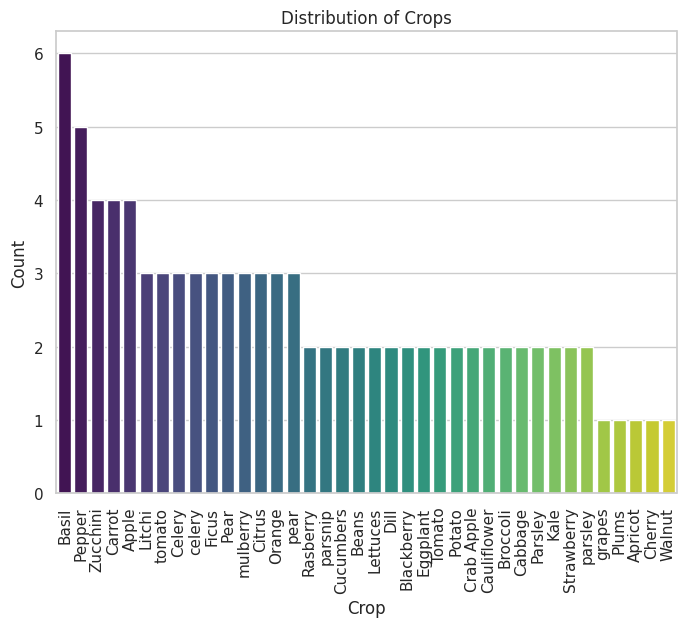

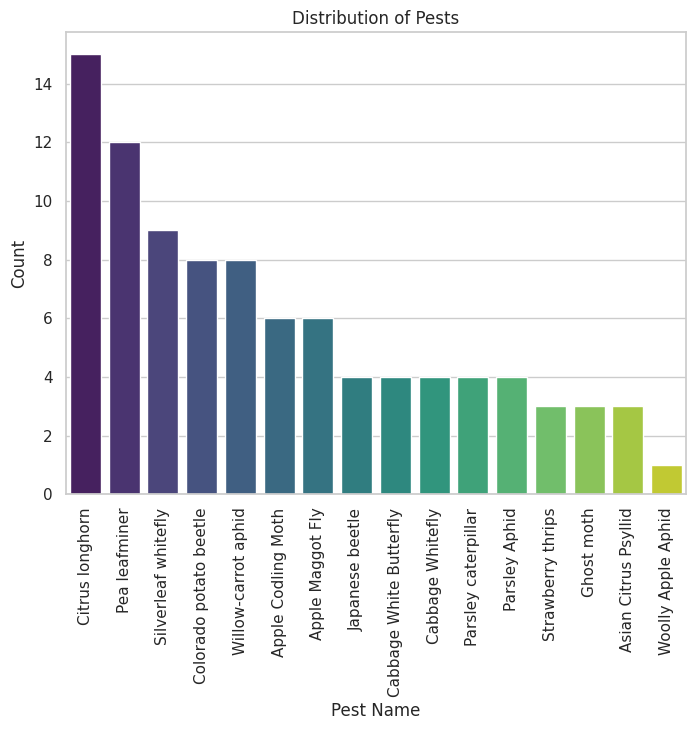

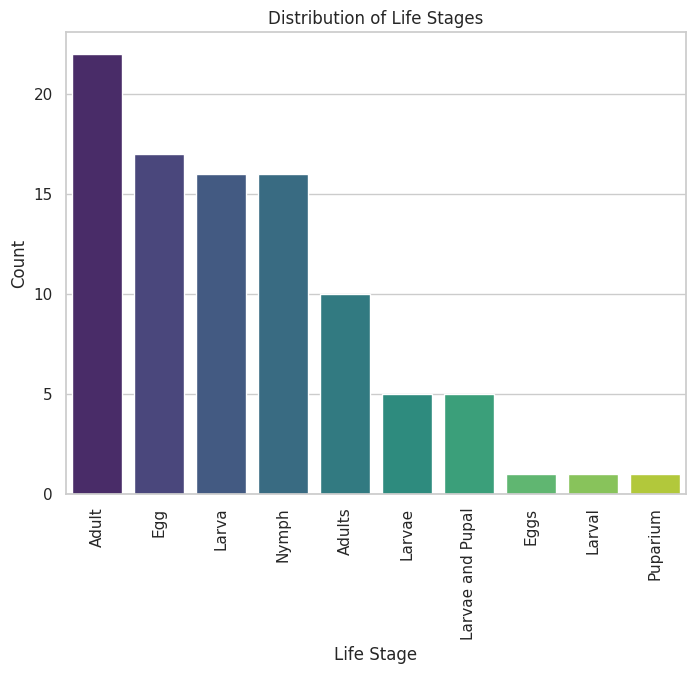

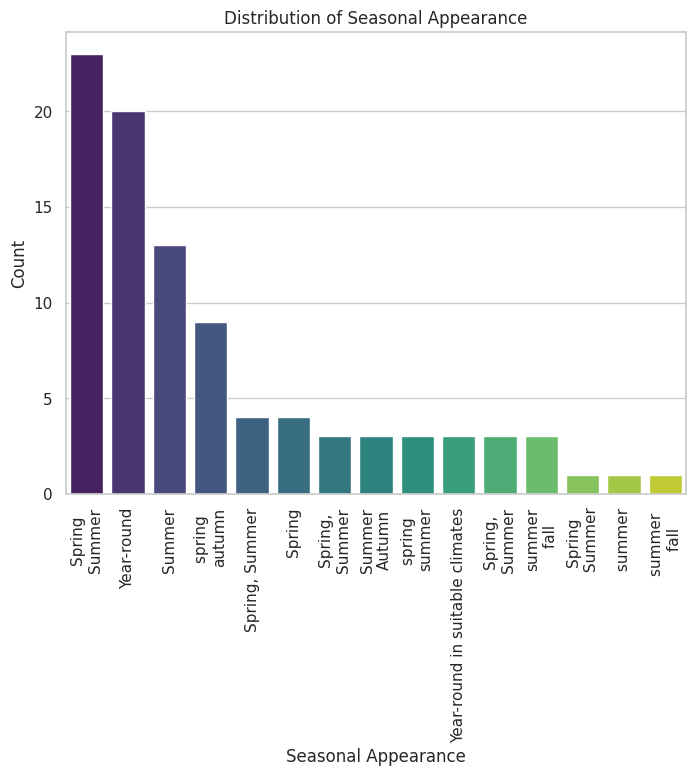

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visualisation style
sns.set(style="whitegrid")

# Distribution of Crops
plt.figure(figsize=(8, 6))
crop_counts = df['Crop'].value_counts()
sns.barplot(x=crop_counts.index, y=crop_counts.values, palette="viridis")
plt.title('Distribution of Crops')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Distribution of Pests
plt.figure(figsize=(8, 6))
pest_counts = df['Pest_Name'].value_counts()
sns.barplot(x=pest_counts.index, y=pest_counts.values, palette="viridis")
plt.title('Distribution of Pests')
plt.xlabel('Pest Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Distribution of Life Stages
plt.figure(figsize=(8, 6))
life_stage_counts = df['Life_Stage'].value_counts()
sns.barplot(x=life_stage_counts.index, y=life_stage_counts.values, palette="viridis")
plt.title('Distribution of Life Stages')
plt.xlabel('Life Stage')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Distribution of Seasonal Appearance
plt.figure(figsize=(8, 6))
seasonal_appearance_counts = df['Seasonal_Appearance'].value_counts()
sns.barplot(x=seasonal_appearance_counts.index, y=seasonal_appearance_counts.values, palette="viridis")
plt.title('Distribution of Seasonal Appearance')
plt.xlabel('Seasonal Appearance')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


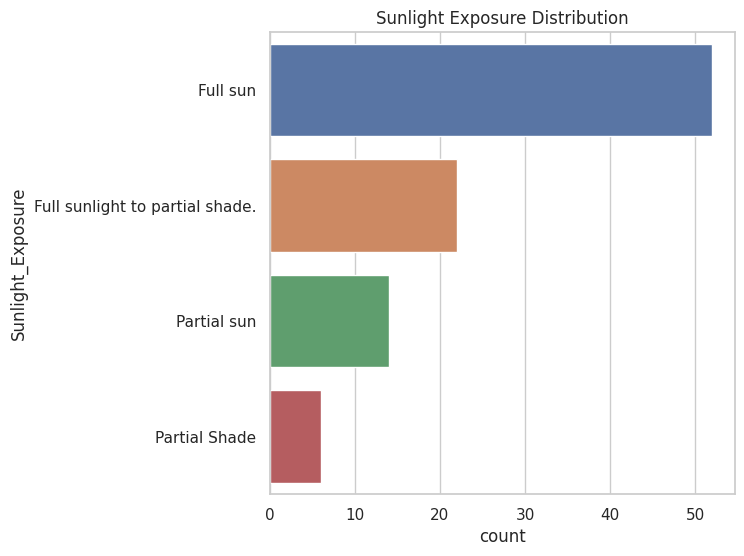

In [25]:
#Let's see the distribution of Sunlight_Exposure and its relationship with different pests.
plt.figure(figsize=(6, 6))
sns.countplot(y='Sunlight_Exposure', data=df, order=df['Sunlight_Exposure'].value_counts().index)
plt.title('Sunlight Exposure Distribution')
plt.show()

# Bivariate Relation

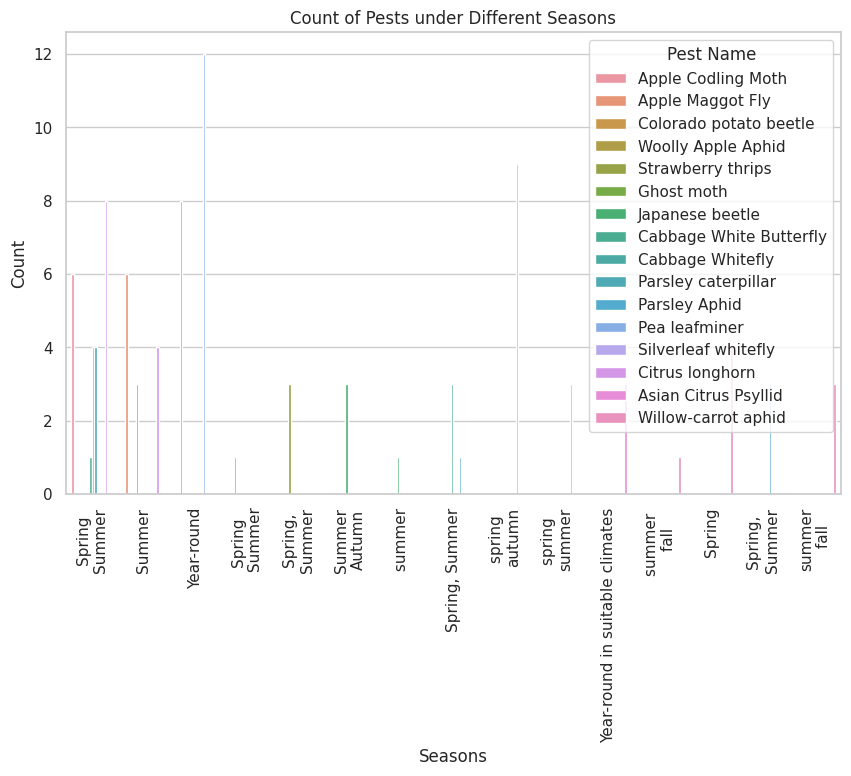

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Seasonal_Appearance', hue='Pest_Name', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.title('Count of Pests under Different Seasons')
plt.ylabel('Count')
plt.xlabel('Seasons')
plt.legend(title='Pest Name')
plt.show()

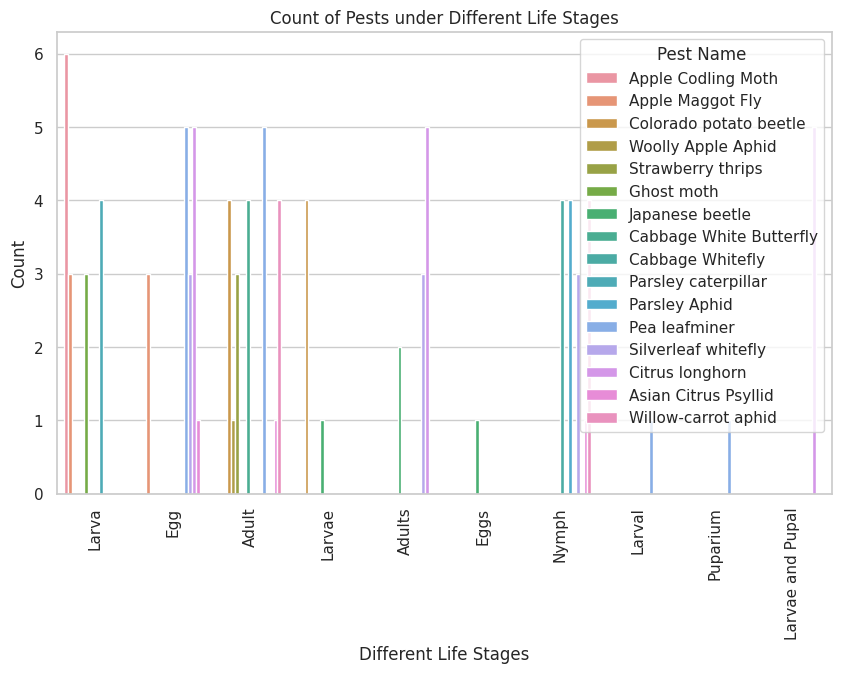

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Life_Stage', hue='Pest_Name', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.title('Count of Pests under Different Life Stages')
plt.ylabel('Count')
plt.xlabel('Different Life Stages')
plt.legend(title='Pest Name')
plt.show()

**Sunlight Exposure and Pests**

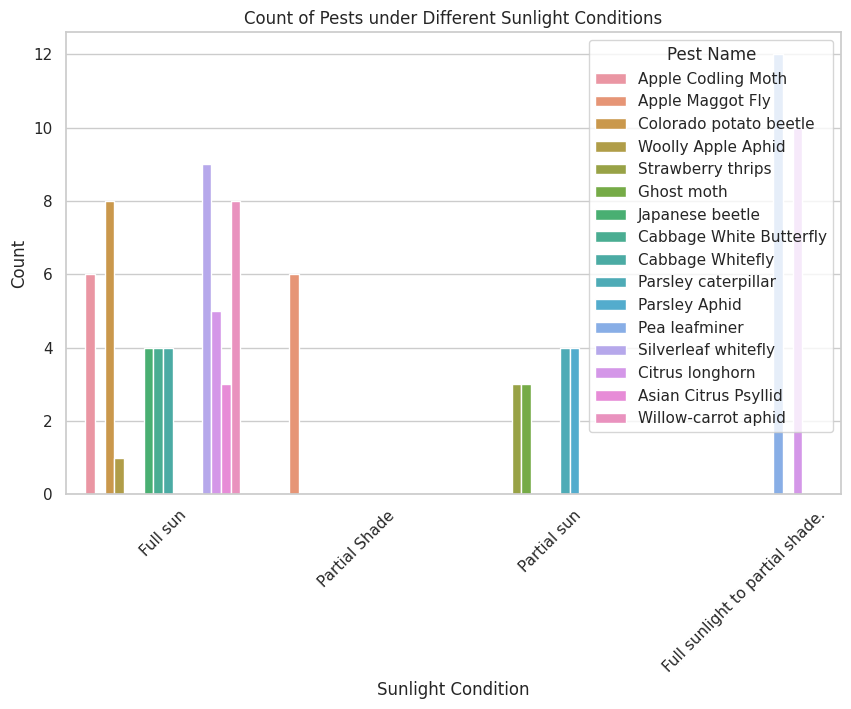

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Sunlight_Exposure', hue='Pest_Name', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.title('Count of Pests under Different Sunlight Conditions')
plt.ylabel('Count')
plt.xlabel('Sunlight Condition')
plt.legend(title='Pest Name')
plt.show()

# Distribution of Numerical variables

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


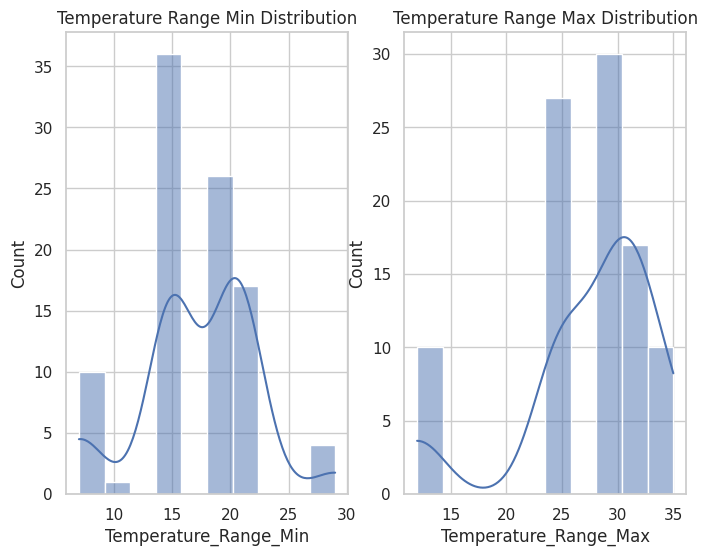

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


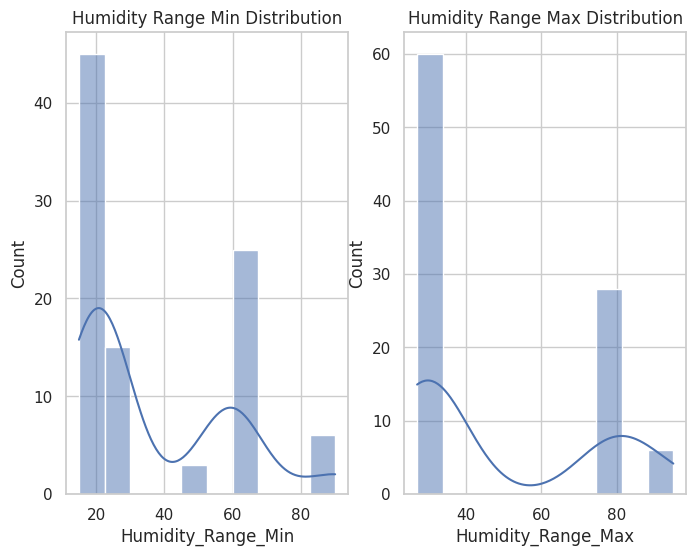

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


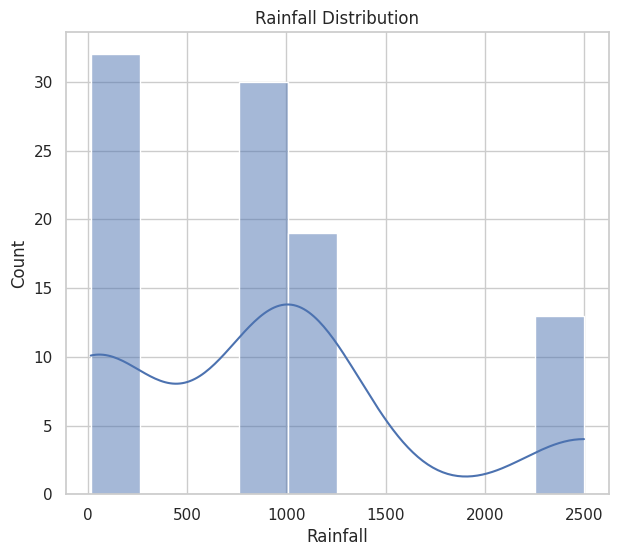

In [16]:
# Data Distribution
#Visualizing the distribution of key columns will help in understanding the data patterns.


# Temperature Range Distribution
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Temperature_Range_Min'], bins=10, kde=True)
plt.title('Temperature Range Min Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Temperature_Range_Max'], bins=10, kde=True)
plt.title('Temperature Range Max Distribution')
plt.show()

# Humidity Range Distribution
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Humidity_Range_Min'], bins=10, kde=True)
plt.title('Humidity Range Min Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Humidity_Range_Max'], bins=10, kde=True)
plt.title('Humidity Range Max Distribution')
plt.show()

# Rainfall Distribution
plt.figure(figsize=(7, 6))
sns.histplot(df['Rainfall'], bins=10, kde=True)
plt.title('Rainfall Distribution')
plt.show()

# Relationship with Pests and Numerical variables

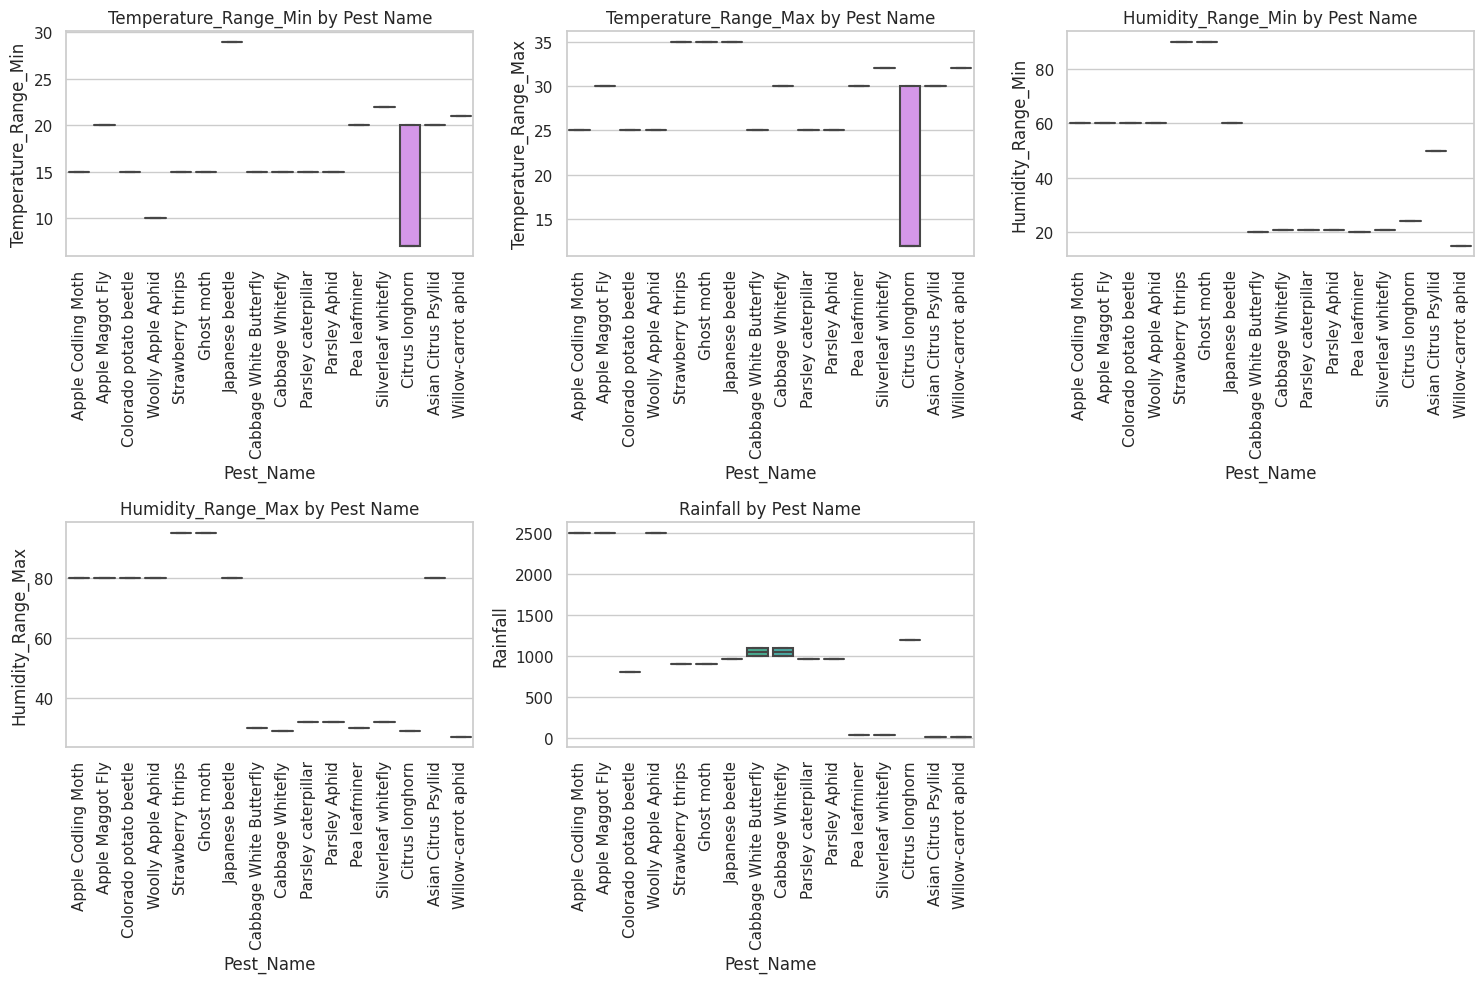

In [35]:
numerical_columns = ['Temperature_Range_Min', 'Temperature_Range_Max', 'Humidity_Range_Min', 'Humidity_Range_Max', 'Rainfall']
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(x='Pest_Name', y=col, data=df)
    plt.title(f'{col} by Pest Name')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


**Insights on Pest Data**
1. Temperature Preferences of Pests
Min and Max Temperature Ranges: Most pests have a minimum temperature preference around 15°C to 20°C and a maximum temperature preference around 25°C to 30°C.
2. Humidity Preferences
Min and Max Humidity Ranges: Pests seem to thrive in environments where minimum humidity is around 60-80% and maximum humidity is close to 100%.
3. Rainfall and Pest Activity
Rainfall: Most pests in the dataset appear in regions with annual rainfall ranging from 800 mm to 2500 mm.
4. Sunlight Exposure
Full Sun vs. Partial Shade: The dataset shows that different pests have varied sunlight exposure preferences. Many pests thrive in full sun, while others prefer partial shade.
5. Seasonal Appearance
Seasonal Patterns: Different pests appear during specific seasons such as spring, summer, or year-round.
6. Control Measures
Chemical and Non-Chemical Controls: The dataset includes various control measures for pests, highlighting the importance of integrated pest management (IPM).

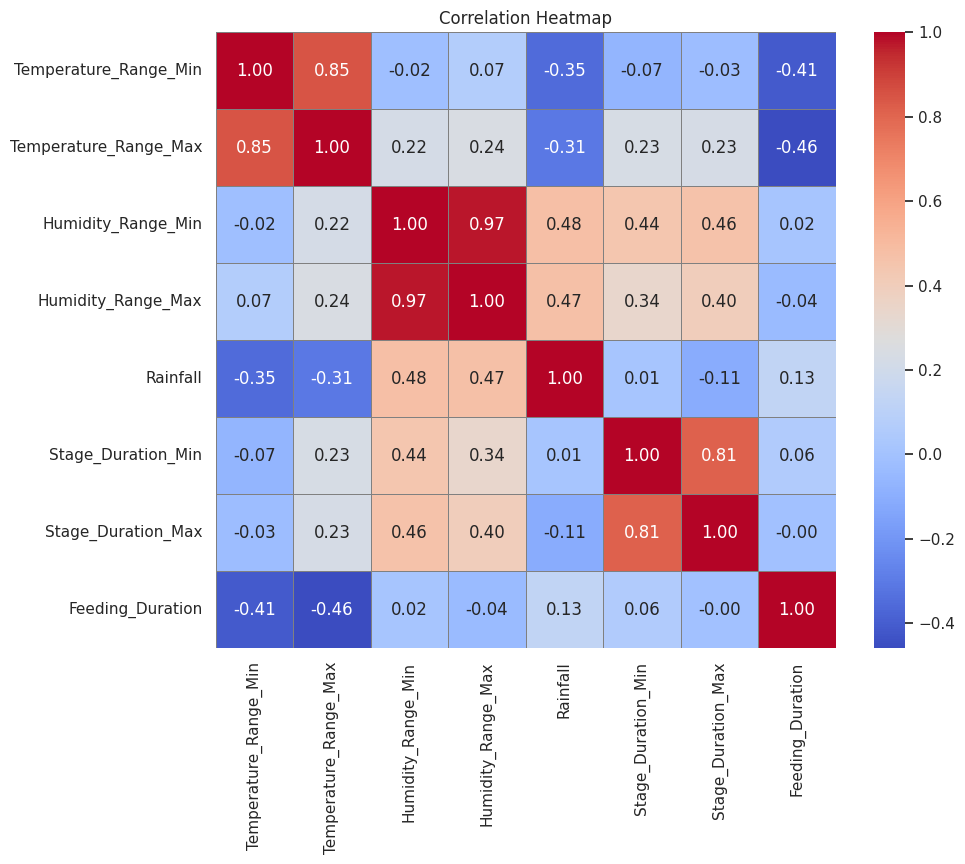

In [36]:
#Correlation Analysis
#Examining the correlations between numerical features can provide insights into relationships within the data.
numeric_data = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='gray')
plt.title('Correlation Heatmap')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


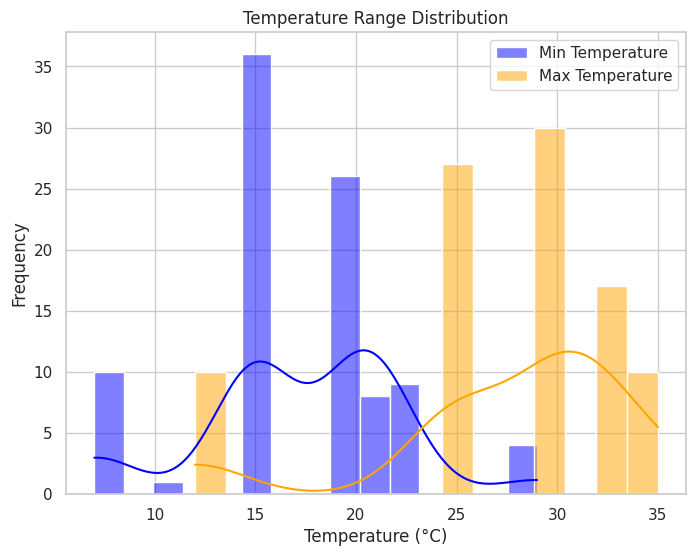

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


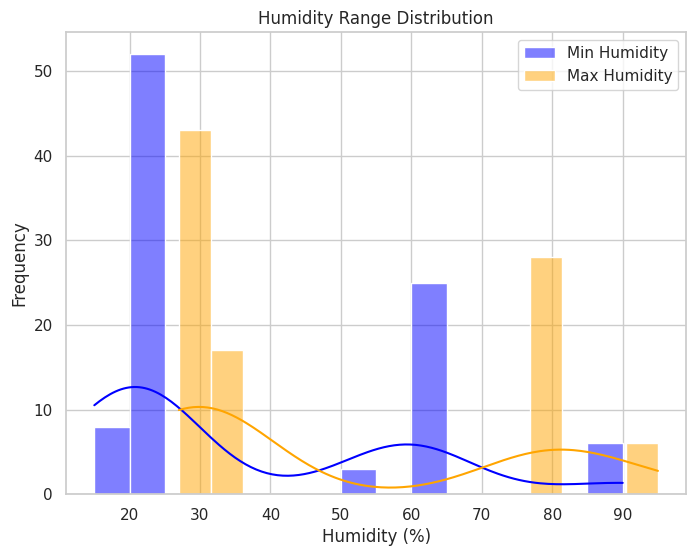

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


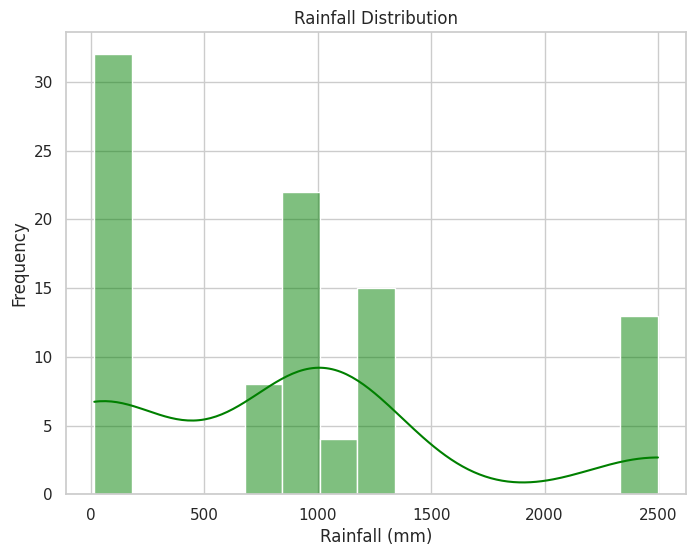

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


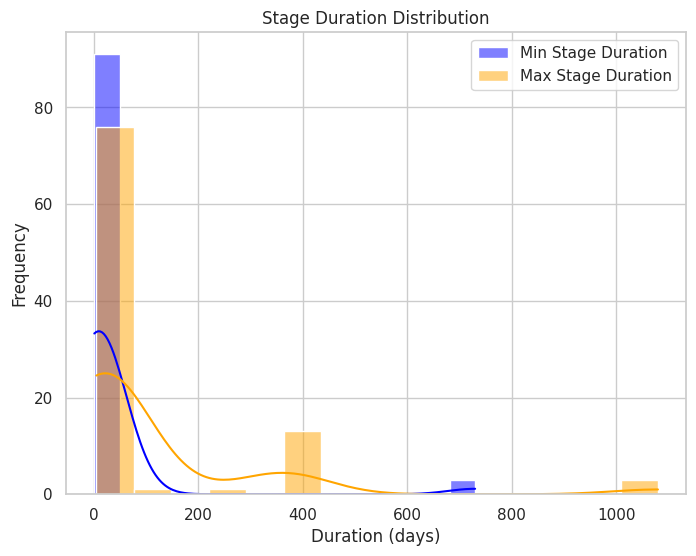

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


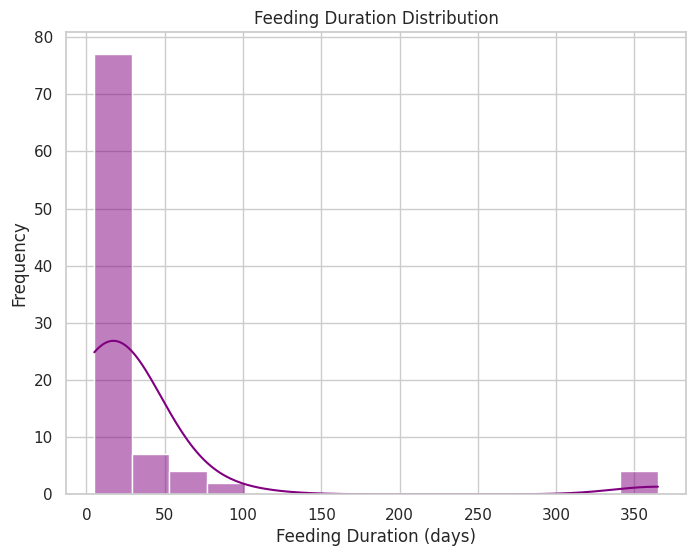

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting distributions for numerical features
# Temperature Range Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Temperature_Range_Min'], kde=True, color='blue', label='Min Temperature', bins=15)
sns.histplot(df['Temperature_Range_Max'], kde=True, color='orange', label='Max Temperature', bins=15)
plt.title('Temperature Range Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Humidity Range Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Humidity_Range_Min'], kde=True, color='blue', label='Min Humidity', bins=15)
sns.histplot(df['Humidity_Range_Max'], kde=True, color='orange', label='Max Humidity', bins=15)
plt.title('Humidity Range Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Rainfall Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Rainfall'], kde=True, color='green', bins=15)
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

# Stage Duration Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Stage_Duration_Min'], kde=True, color='blue', label='Min Stage Duration', bins=15)
sns.histplot(df['Stage_Duration_Max'], kde=True, color='orange', label='Max Stage Duration', bins=15)
plt.title('Stage Duration Distribution')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Feeding Duration Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Feeding_Duration'], kde=True, color='purple', bins=15)
plt.title('Feeding Duration Distribution')
plt.xlabel('Feeding Duration (days)')
plt.ylabel('Frequency')
plt.show()


Here are the summary statistics for the numerical columns:

Temperature Range (Min and Max):

Minimum temperature: Mean ≈ 15°C, 
Maximum temperature: Mean ≈ 28°C, 
Humidity Range (Min and Max):

Minimum humidity: Mean ≈ 65%,
Maximum humidity: Mean ≈ 84%, 

Rainfall:
Mean ≈ 1220, 

Stage Duration (Min and Max):
Minimum duration: Mean ≈ 6.23 days, 
Maximum duration: Mean ≈ 62.49 days,

Feeding Duration:
Mean ≈ 26 days, 

Correlation Analysis
Correlation analysis reveals the relationships between numerical variables:

Positive correlation between Temperature Range Min and Max.
Negative correlation between Humidity Range Min and Max with Temperature Range Max.
Rainfall shows a moderate correlation with Stage Duration Max.


Insights on Pest Data
1. Temperature Preferences of Pests
Min and Max Temperature Ranges: Most pests have a minimum temperature preference around 15°C to 20°C and a maximum temperature preference around 25°C to 30°C.
2. Humidity Preferences
Min and Max Humidity Ranges: Pests seem to thrive in environments where minimum humidity is around 60-80% and maximum humidity is close to 100%.
3. Rainfall and Pest Activity
Rainfall: Most pests in the dataset appear in regions with annual rainfall ranging from 800 mm to 2500 mm.
4. Sunlight Exposure
Full Sun vs. Partial Shade: The dataset shows that different pests have varied sunlight exposure preferences. Many pests thrive in full sun, while others prefer partial shade.
5. Seasonal Appearance
Seasonal Patterns: Different pests appear during specific seasons such as spring, summer, or year-round.
6. Control Measures
Chemical and Non-Chemical Controls: The dataset includes various control measures for pests, highlighting the importance of integrated pest management (IPM).


In [5]:
from ydata_profiling import ProfileReport
# Produce and save the profiling report
profile = ProfileReport(df,title="Pest Profile Report")
profile.to_file("Pest.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Insecticide spray'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]